In [18]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from IPython.display import display 
from PIL import Image, ImageOps

In [2]:
# Load the file names and their respective target labels into numpy arrays! 

from sklearn.datasets import load_files       #Load text files with categories as subfolder names
import numpy as np

train_dir = "D:/Ronit/Data Science/Projects/Deep Learning - Image Recognition/Data/fruits-360/Training"
test_dir = "D:/Ronit/Data Science/Projects/Deep Learning - Image Recognition/Data/fruits-360/Test"

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  67692
Testing set size :  22688


In [3]:
# Target labels are numbers corresponding to class label. Converting them to a vector of 114 elements

from keras.utils import np_utils
no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [4]:
# Dividing the Validation set into Test and Validation set

x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 131)
Test X :  (15688,)
Test y :  (15688, 131)


In [5]:
# Converting the images into numeric data

from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (15688, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [6]:
x_train[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [7]:
# Rescaling the pixel values within 0 and 1

x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

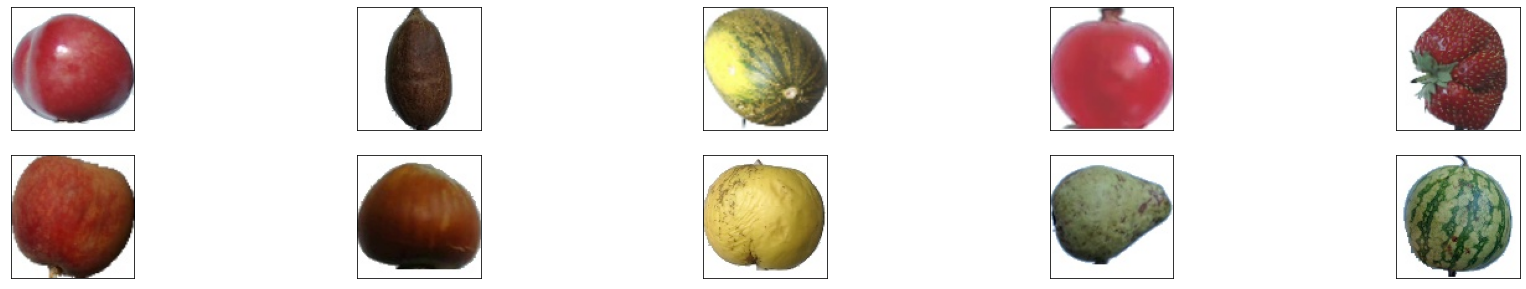

In [8]:
#Visualizing the first 10 training images

import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i])) 

In [9]:
# Building a CNN

img_row = 100
img_col = 100

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation = "relu", input_shape = (img_row, img_col, 3), padding = "same"))
model.add(MaxPool2D(2))
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=3, activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dense(131, activation = "softmax"))

In [10]:
# Compiling the model

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [11]:
# Creating a checkpoint to store the best parameters

batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train, 
                    
        batch_size = 1024, epochs=3, validation_data=(x_valid, y_vaild), callbacks = [checkpointer], verbose=1, shuffle=True)

Epoch 1/3
67/67 [==============================] - 589s 9s/step - loss: 3.2126 - accuracy: 0.3165 - val_loss: 0.8373 - val_accuracy: 0.7794

Epoch 00001: val_loss improved from inf to 0.83729, saving model to cnn_fruits.hdf5
Epoch 2/3
67/67 [==============================] - 581s 9s/step - loss: 0.1755 - accuracy: 0.9529 - val_loss: 0.4495 - val_accuracy: 0.8803

Epoch 00002: val_loss improved from 0.83729 to 0.44951, saving model to cnn_fruits.hdf5
Epoch 3/3
67/67 [==============================] - 544s 8s/step - loss: 0.0322 - accuracy: 0.9934 - val_loss: 0.2930 - val_accuracy: 0.9267

Epoch 00003: val_loss improved from 0.44951 to 0.29299, saving model to cnn_fruits.hdf5


# The Accuracy of the model is 99.64% on the training set and 93% on the Validation set.

In [12]:
# Loading the best weights 

model.load_weights('cnn_fruits.hdf5')

In [13]:
# Predicting

#y_pred = model.predict(x_test)


In [14]:
# Save the model to file in the current directory

import pickle
#Pkl_Filename = "detection_model.pkl"  

with open("Pkl_file", 'wb') as file:  
    pickle.dump(model, file)

TypeError: cannot pickle 'weakref' object

In [17]:
import joblib
joblib.dump(model, "model_joblib")

TypeError: cannot pickle 'weakref' object

In [21]:
from keras.models import load_model

model.save('my_model.h5')

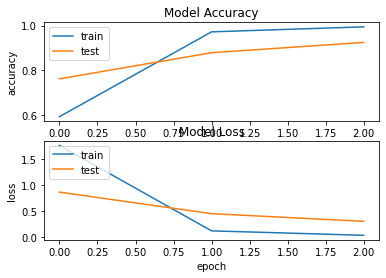

In [ ]:
# Visualizing the Loss and Accuracy against Epochs

import matplotlib.pyplot as plt 
plt.figure(1)    
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# The End!

In [ ]:
#!ngrok authtoken 1xthih8xHfQ4Zx3D0sCy03bbB7T_7GRYUNMPw9JRS7p2QFcaD

Authtoken saved to configuration file: C:\Users\ronit/.ngrok2/ngrok.yml


In [20]:

# streamlit run C:\Users\ronit\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel_launcher.py 

In [19]:
#from pyngrok import ngrok
#url=ngrok.connect(port=8500)
#url